In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

In [13]:
# y=2x^2+2の勾配
x_np = np.arange(-2, 2.1, 0.25)
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [15]:
# tensor化
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
x

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)

In [16]:
# テンソル計算 -> yもテンソル変数になる
y = 2* x**2 + 2
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


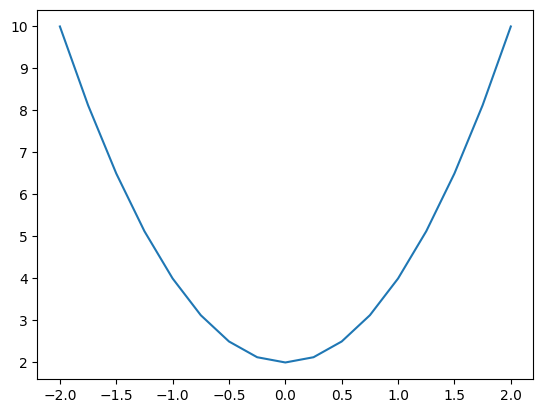

In [19]:
plt.plot(x.data, y.data)

In [20]:
# 1階層テンソルのスカラーでないと勾配は見れないので、sumする
z = y.sum()

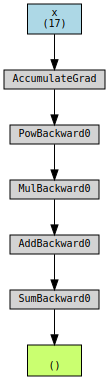

In [27]:
# 計算グラフの可視化
g = make_dot(z, params={'x':x})
display(g)

<解説>  
・青色のノード：リーフノード  
・()は変数のshape -> 下のノードは０階層のスカラー  
・AccumulateGradは勾配値を蓄積する場所  
・\*Backward0の*の文字は関数名  



In [28]:
# 勾配の計算
z.backward()

In [29]:
x.grad

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])

In [30]:
x

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)

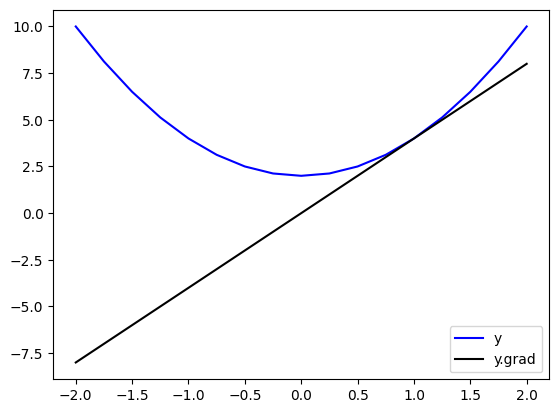

In [41]:
plt.plot(x.data, y.data, color='b', label='y')
plt.plot(x.data, x.grad, c='k', label='y.grad')
plt.legend()

In [42]:
# 2回目の勾配計算
y = 2*x**2 + 2
z = y.sum()
z.backward()

print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [45]:
# gradの初期化
x.grad.zero_()
x.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
c = np.arange(0, 11, 1)
y = 3*c**2 + 1
a = 6*c


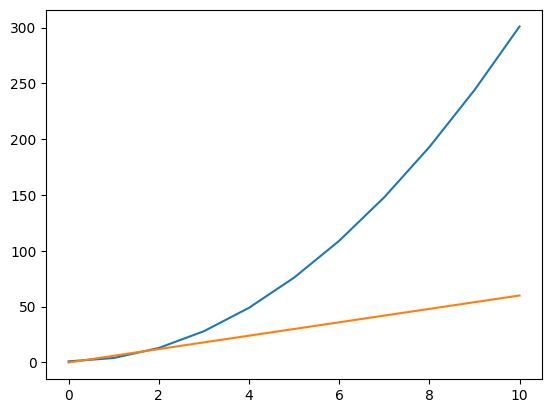

In [57]:
plt.plot(c, y)
plt.plot(c, a)

## Sigmoidの場合

In [58]:
sigmoid = torch.nn.Sigmoid()

In [60]:
y = sigmoid(x)

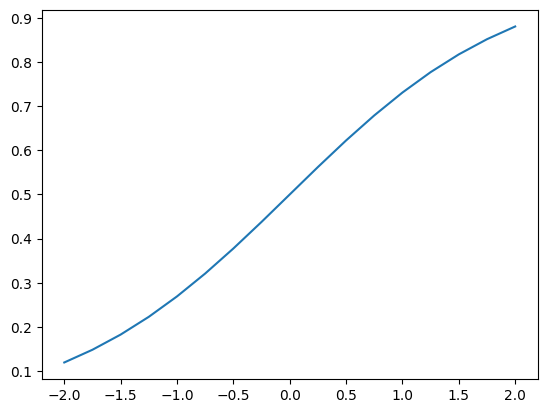

In [62]:
plt.plot(x.data, y.data)

In [63]:
# 計算グラフを見るためにsumでスカラーにする
z = y.sum()

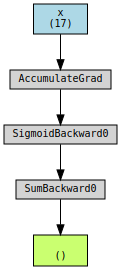

In [64]:
g = make_dot(z, params={'x':x})
g

In [65]:
z.backward()

In [66]:
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


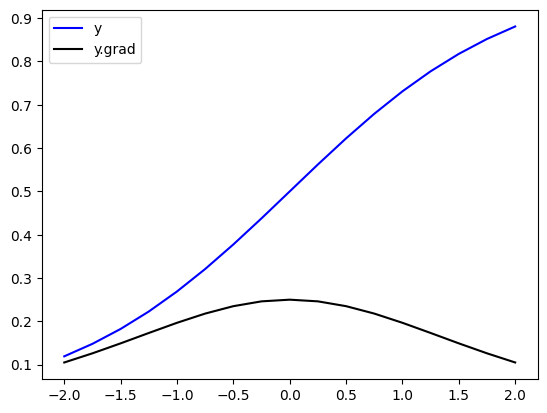

In [67]:
plt.plot(x.data, y.data, color='b', label='y')
plt.plot(x.data, x.grad, c='k', label='y.grad')
plt.legend()

In [68]:
x.grad.zero_()


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
# シグモイド関数の定義

def sigmoid(x):
return(1/(1 + torch.exp(-x)))


y = sigmoid(x)

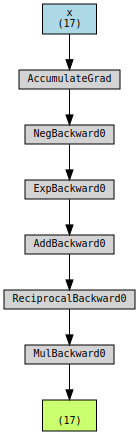

In [75]:
make_dot(y, {'x':x})